In [1]:
import math
import numpy as np
import mat
import matplotlib.pyplot as plt
import reckoner as reck
import slabgridding as slg

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

In [15]:
def plotXYZ(X,Y,Z, szone, plotmesh = True, ax=None, Z2deg=True, pltcolor=None):
    if Z2deg:
        km2deg = 1/111
        degZ = []
        for z in Z:
            degZ.append(z*km2deg)
        Z = degZ
    if szone is not None:
        subdmod =  mat.getdict('../data/subduction_model/subduction_model.mat')
        tX = mat.flatten(subdmod[szone]['lon'].tolist())
        tY = mat.flatten(subdmod[szone]['lat'].tolist())
        tZ = mat.flatten(subdmod[szone]['dep'].tolist())
    
    if ax is None:
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))
        
    if szone is not None:
        ax.plot3D(tX, tY, tZ,'.', color='b');
    if plotmesh:
        for x,y,z in zip(X,Y,Z):
            ax.plot3D(x, y, z,'-', color='r');
        Xt = np.transpose(X).tolist()
        Yt = np.transpose(Y).tolist()
        Zt = np.transpose(Z).tolist()
        for x,y,z in zip(Xt,Yt,Zt):
            ax.plot3D(x, y, z,'-', color='r');  
    else:
        if pltcolor is None:
            ax.plot3D(X, Y, Z,'.', color='k');
        else:
            ax.plot3D(X, Y, Z,'.', color=pltcolor);


def write_gridfile(szone,outfile, fsheetdep=None, is_midslabmesh = False, dx_km=11):
    #
    X,Y,Z = slg.compute_slabgrids(szone, fileout=None, dx_km=11, dep_finterp=fsheetdep, \
                              doplot=False, clipzone=True)
    nrows = len(X)
    ncols = len(X[0])
    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)
    clat, clon, cdep = [],[],[]

    fout = open(outfile, 'w')
    if is_midslabmesh:
        fout.write('clon,clat,cdep,lon1,lat1,dep1,lon2,lat2,dep2,lon3,lat3,dep3,lon4,lat4,dep4')
    else:
        fout.write('clon,clat,cdep')
    
    for i in range(nrows-1):
        for j in range(ncols-1):
            cx = round(np.mean([X[i,j], X[i+1,j], X[i,j+1], X[i+1,j+1]]),4)
            cy = round(np.mean([Y[i,j], Y[i+1,j], Y[i,j+1], Y[i+1,j+1]]),4)
            cz = round(np.mean([Z[i,j], Z[i+1,j], Z[i,j+1], Z[i+1,j+1]]),3)
            if np.isnan(cz):
                continue
            if is_midslabmesh:
                fout.write('\n%.4f,%.4f,%.3f' %(cx,cy,cz))
                fout.write(',%.4f,%.4f,%.3f' %(X[i,j],Y[i,j],Z[i,j]))
                fout.write(',%.4f,%.4f,%.3f' %(X[i+1,j],Y[i+1,j],Z[i+1,j]))
                fout.write(',%.4f,%.4f,%.3f' %(X[i+1,j+1],Y[i+1,j+1],Z[i+1,j+1]))
                fout.write(',%.4f,%.4f,%.3f' %(X[i,j+1],Y[i,j+1],Z[i,j+1]))
            else:
                fout.write('\n%.4f,%.4f,%.3f' %(cx,cy,cz))
    fout.close()


In [4]:
## ONE TIME AFFAIR - OKAY
szone = 'puy'
finterp_dep = np.load('grids/finterp_slabsheets.npy', allow_pickle=True)[()]
fintp_sheet1 = finterp_dep[szone]['sheet1']
fintp_sheet2 = finterp_dep[szone]['sheet2']
fintp_sheet3 = finterp_dep[szone]['sheet3']
# compute_slabgrids(szone, fileout, dx_km=11, doplot=False, dep_finterp=None, clipzone = False)
# Note that dep_finterp is configurable
outfile = 'grids/'+szone+'-grid_slabsheet1.csv'
write_gridfile(szone,outfile, fsheetdep= fintp_sheet1, is_midslabmesh=False, dx_km=11)
outfile = 'grids/'+szone+'-grid_slabsheet2.csv'
write_gridfile(szone,outfile, fsheetdep= fintp_sheet2, is_midslabmesh=False, dx_km=11)
outfile = 'grids/'+szone+'-grid_slabsheet3.csv'
write_gridfile(szone,outfile, fsheetdep= fintp_sheet3, is_midslabmesh=False, dx_km=11)
outfile = 'grids/'+szone+'-meshgrid_slabsheet2.csv'
write_gridfile(szone,outfile, fsheetdep= fintp_sheet2, is_midslabmesh=True, dx_km=11)

szone = 'hik'
finterp_dep = np.load('grids/finterp_slabsheets.npy', allow_pickle=True)[()]
fintp_sheet1 = finterp_dep[szone]['sheet1']
fintp_sheet2 = finterp_dep[szone]['sheet2']
fintp_sheet3 = finterp_dep[szone]['sheet3']
# compute_slabgrids(szone, fileout, dx_km=11, doplot=False, dep_finterp=None, clipzone = False)
# Note that dep_finterp is configurable
outfile = 'grids/'+szone+'-grid_slabsheet1.csv'
write_gridfile(szone,outfile, fsheetdep= fintp_sheet1, is_midslabmesh=False, dx_km=11)
outfile = 'grids/'+szone+'-grid_slabsheet2.csv'
write_gridfile(szone,outfile, fsheetdep= fintp_sheet2, is_midslabmesh=False, dx_km=11)
outfile = 'grids/'+szone+'-grid_slabsheet3.csv'
write_gridfile(szone,outfile, fsheetdep= fintp_sheet3, is_midslabmesh=False, dx_km=11)
outfile = 'grids/'+szone+'-meshgrid_slabsheet2.csv'
write_gridfile(szone,outfile, fsheetdep= fintp_sheet2, is_midslabmesh=True, dx_km=11)

In [13]:
import csv
def read_grid(grid_file):
    glon,glat, gdep = [],[],[]
    with open(gridfile, 'r') as f:
        csvreader = csv.reader(f)
        header = next(csvreader)
        for row in csvreader:
            glon.append(float(row[0]))
            glat.append(float(row[1]))
            gdep.append(float(row[2]))  
    return glon, glat, gdep

<IPython.core.display.Javascript object>


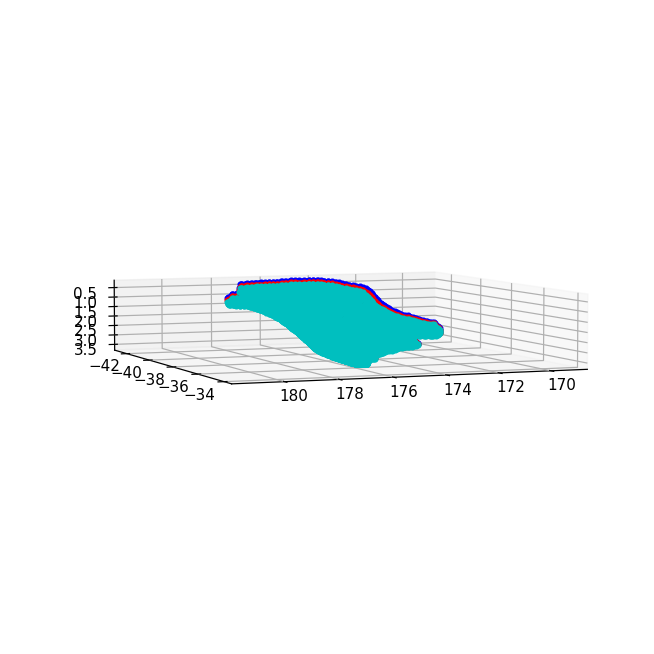

In [18]:
# visual check
szone ='hik'
gridfile='grids/'+szone+'-grid_slabsheet1.csv'
x1,y1,z1 = read_grid(gridfile)
gridfile='grids/'+szone+'-grid_slabsheet2.csv'
x2,y2,z2 = read_grid(gridfile)
gridfile='grids/'+szone+'-grid_slabsheet3.csv'
x3,y3,z3 = read_grid(gridfile)
#doplot = False
%matplotlib notebook
fig = plt.figure( figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1,1,0.2])
plotXYZ(x1,y1,z1, None, ax=ax, plotmesh = False, Z2deg=True, pltcolor='b')
plotXYZ(x2,y2,z2, None, ax=ax, plotmesh = False, Z2deg=True, pltcolor='r')
plotXYZ(x3,y3,z3, None, ax=ax, plotmesh = False, Z2deg=True, pltcolor='c')
ax.invert_zaxis();

In [ ]:
# visual check
szone ='puy'
gridfile='grids/'+szone+'-grid_slabsheet1.csv'
x1,y1,z1 = read_grid(gridfile)
gridfile='grids/'+szone+'-grid_slabsheet2.csv'
x2,y2,z2 = read_grid(gridfile)
gridfile='grids/'+szone+'-grid_slabsheet3.csv'
x3,y3,z3 = read_grid(gridfile)
#doplot = False
%matplotlib notebook
fig = plt.figure( figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1,1,0.2])
plotXYZ(x1,y1,z1, None, ax=ax, plotmesh = False, Z2deg=True, pltcolor='b')
plotXYZ(x2,y2,z2, None, ax=ax, plotmesh = False, Z2deg=True, pltcolor='r')
plotXYZ(x3,y3,z3, None, ax=ax, plotmesh = False, Z2deg=True, pltcolor='c')
ax.invert_zaxis();